# Time Series Analysis of the Air Passenger Dataset
International Airline Passengers (airpass). The data contains the number of total passengers every month, from January 1949 to December 1960. 

Dahai Liu

### Recap of analysis in homework 1

###### Train-Test split

In [1]:
### Import data and plot the ts

airdata = read.csv("airpass.csv",header = T,sep = ",")

### Train test split
airpass.ts      = ts(airdata$airpass, frequency = 12, start = c(1949,1), end = c(1959, 12)) # years 1949- 1959.
airpass.ts
airpass.ts.test = ts(tail(airdata$airpass, n = 12), frequency = 12, start = c(1960,1))
airpass.ts.test



     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

###### Take log and add a moving average line

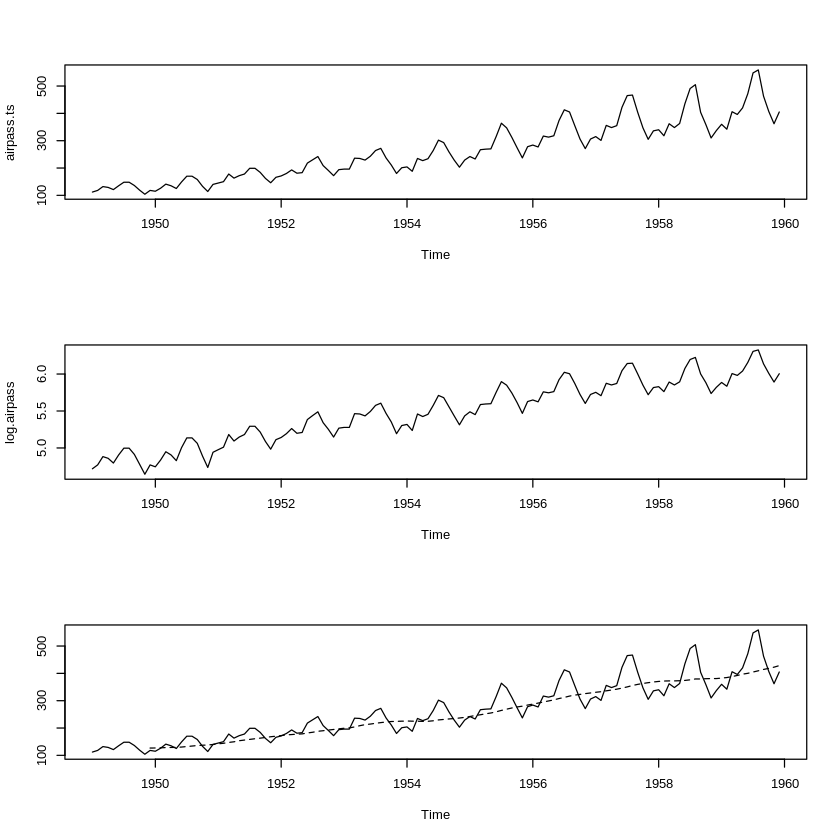

In [2]:
par(mfrow=c(3,1))
plot(airpass.ts)

### Log 
log.airpass <- log(airpass.ts)
plot(log.airpass, type = 'l')

## Generate a moving average line and add it in the plot
library('TTR')
airpass.ma <- SMA(airpass.ts, n=12) 
ts.plot(airpass.ts, airpass.ma, lty=c(1,2))

###### Decomposition of trend, seasonality and then smooth out. Plot Residual

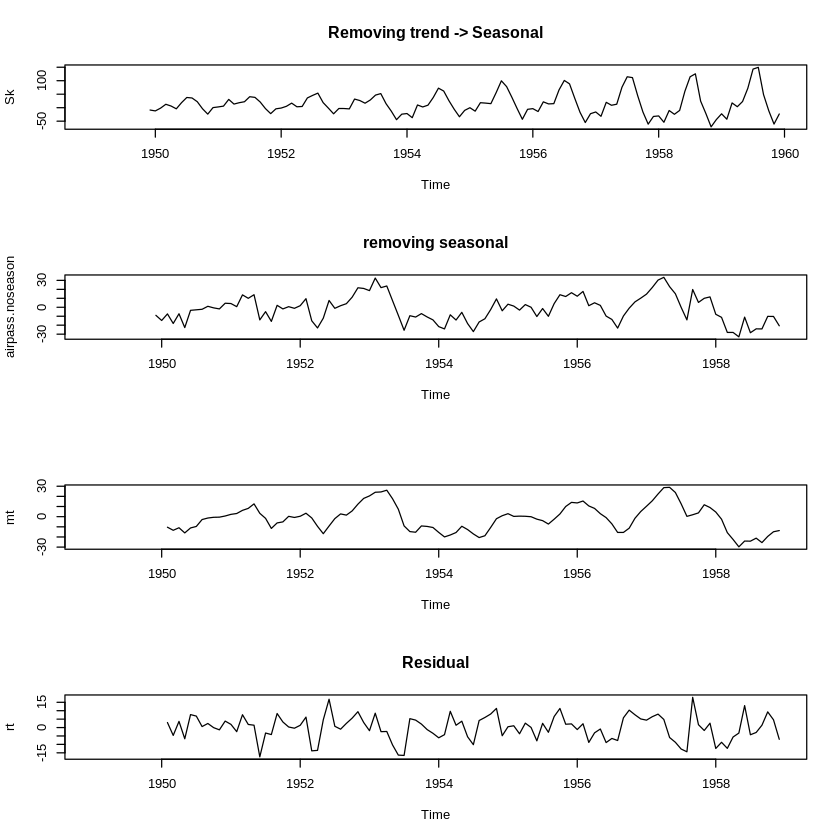

In [3]:
par(mfrow=c(4,1))
### Seasonal Compoment
Sk <- airpass.ts - airpass.ma  ### remove the moving average (trend): To estimate the seasonal component
plot(Sk, main = 'Removing trend -> Seasonal')

airpass.noseason <- Sk - lag(Sk, k=12) ### Removing seasonal:
plot(airpass.noseason, main = 'removing seasonal')

### 3 period simple moving average to the deseasonalized data
mt <- SMA(airpass.noseason, n = 3, main = 'MA3 period smooth out') ### Smoothout
plot(mt)


### Plot the residule and now it looks like white noise
rt <- airpass.noseason - mt
plot(rt, main =  'Residual')


Time Series:
Start = c(1950, 2) 
End = c(1958, 12) 
Frequency = 11.9999999999998 
  [1]   2.97222222  -4.66666667   3.66666667  -6.66666667   7.69444444
  [6]   6.80555556   0.58333333   2.41666667  -0.05555556  -1.36111111
 [11]   3.83333333   1.88888889  -2.44444444   7.61111111   1.83333333
 [16]   1.38888889 -17.38888889  -3.25000000  -4.16666667   8.33333333
 [21]   3.30555556   0.33333333  -0.38888889   1.33333333   6.19444444
 [26] -13.83333333 -13.55555556   4.61111111  16.80555556   0.75000000
 [31]  -0.97222222   2.47222222   5.58333333   9.41666667   3.00000000
 [36]  -1.86111111   8.52777778  -2.44444444  -2.33333333 -10.33333333
 [41] -16.36111111 -16.55555556   5.27777778   4.41666667   2.05555556
 [46]  -1.22222222  -3.41666667  -6.08333333  -4.22222222   9.63888889
 [51]   1.36111111   3.77777778  -5.47222222 -10.16666667   4.16666667
 [56]   5.97222222   8.02777778  11.36111111  -4.86111111   0.47222222
 [61]   1.05555556  -3.69444444   2.61111111   0.05555556  -7.8888

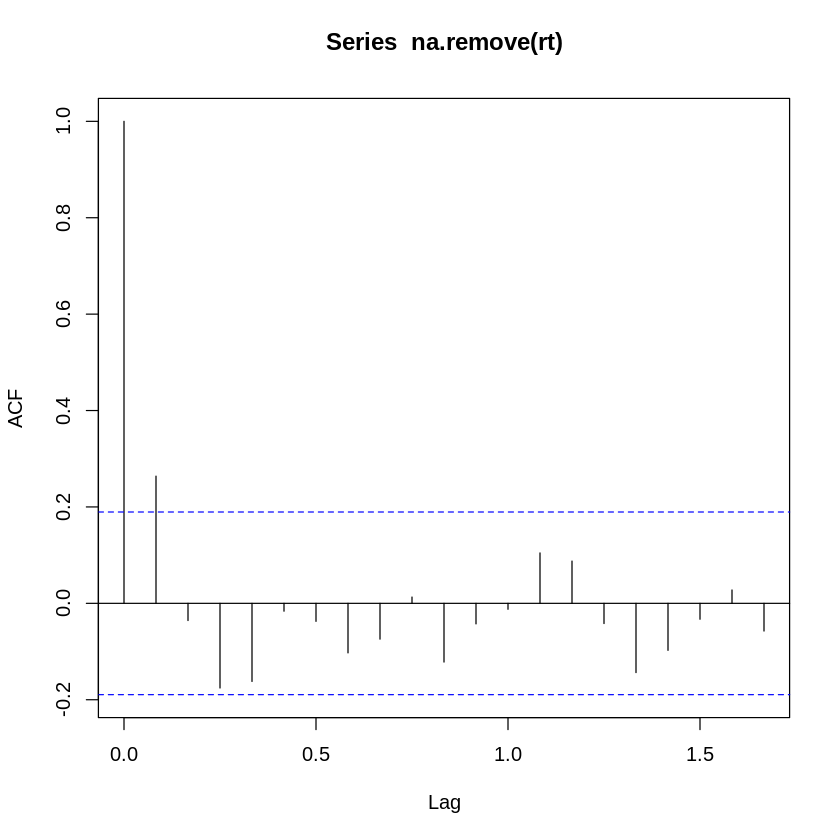

In [4]:
library('tseries')

na.remove(rt)

acf(na.remove(rt))

#### Now the residual has a good ACF which does not look correlated, which indicate a good model

### (a) Perform a time series analysis on the airline data set for the years 1949- 1959.

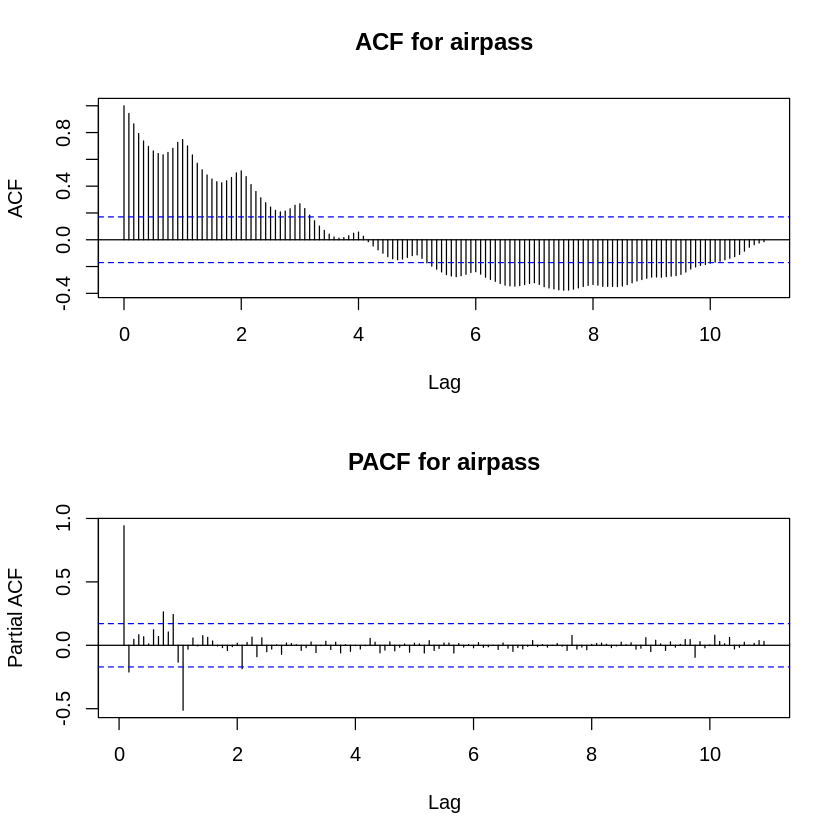

In [5]:
par(mfrow=c(2,1))
library(forecast)

acf(airpass.ts, lag.max = 1000, main = "ACF for airpass")
### This suggest a non stationary dataset so we need to de-seasonalize the data before deciding orders

pacf(airpass.ts, lag.max = 1000, main = "PACF for airpass")

##### Taking orders of differencing and try to find the ARIMA parameters 

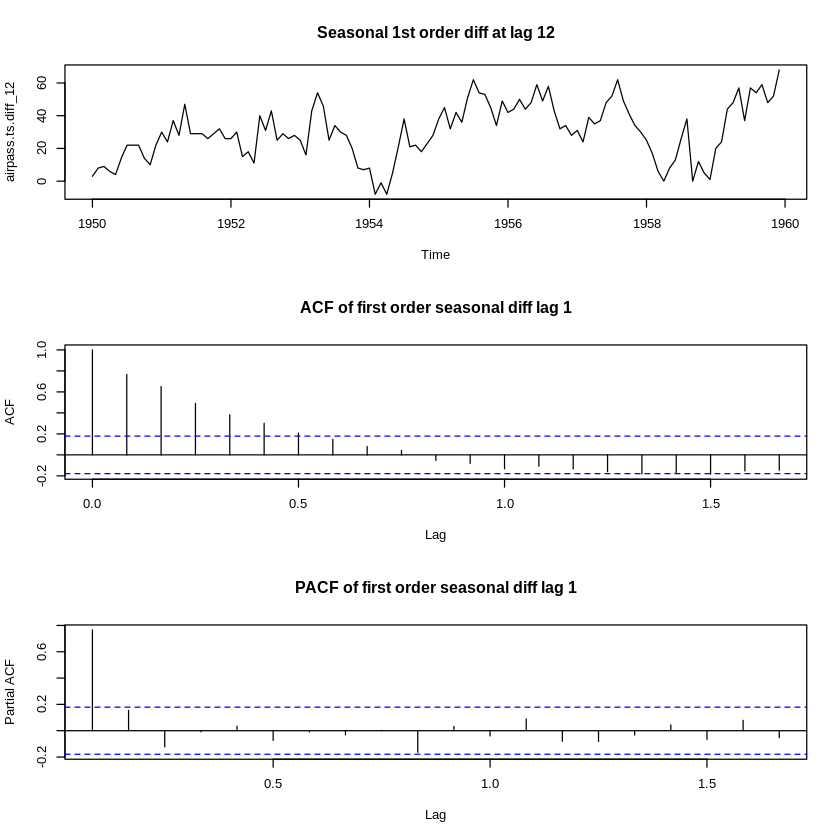

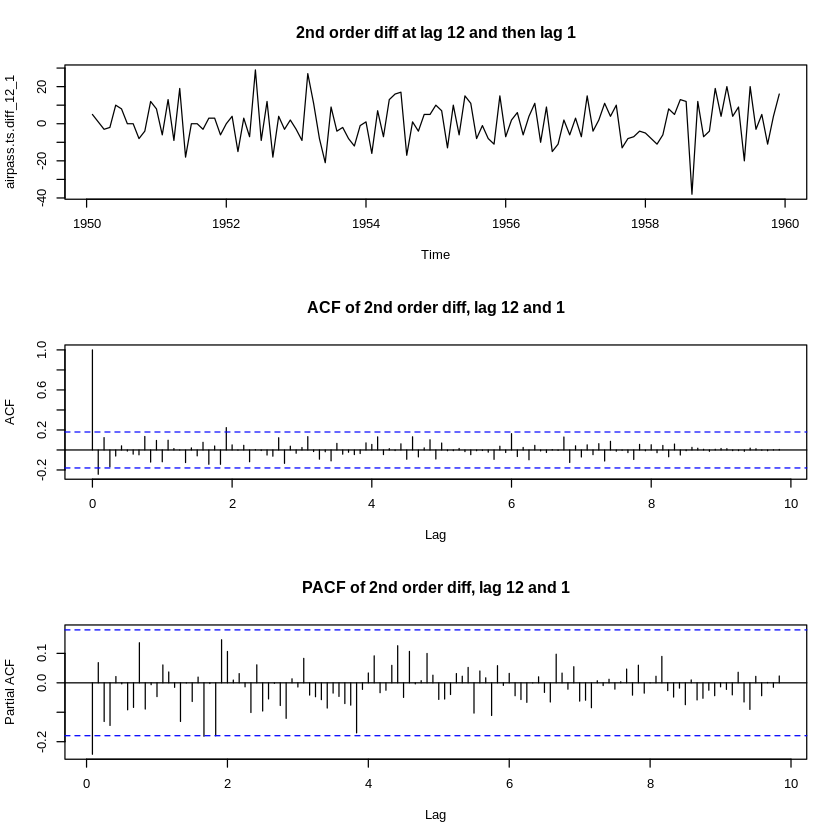

In [6]:
par(mfrow=c(3,1))
### Take the 1st order differencing of lag 12 for seasonality
airpass.ts.diff_12  <- diff(airpass.ts, lag = 12)
plot(airpass.ts.diff_12, main = 'Seasonal 1st order diff at lag 12')
acf(airpass.ts.diff_12, main = 'ACF of first order seasonal diff lag 1')
acf(type = 'partial', airpass.ts.diff_12, main = 'PACF of first order seasonal diff lag 1')
### Still non-stationary by the ACF

### Take second order differencing at lag 1
airpass.ts.diff_12_1  <- diff(airpass.ts.diff_12, lag = 1)
plot(airpass.ts.diff_12_1, main = '2nd order diff at lag 12 and then lag 1') 
### This is stationarilized, it has ACF
acf(airpass.ts.diff_12_1, lag.max = 600, main = 'ACF of 2nd order diff, lag 12 and 1') ### 
acf(type = 'partial', airpass.ts.diff_12_1, lag.max = 600, main = 'PACF of 2nd order diff, lag 12 and 1') ### 
### (p=1,d=1,q=1 or 0)(P=0,D=1,Q=0)m



In [7]:
#### This suggest (p=1,d=1,q=0, P=0,D=1,Q=0, m=12)
#### Negative acf(1) sig, MA1

#### This time take lag 1 first (instead of 12 first) and see difference

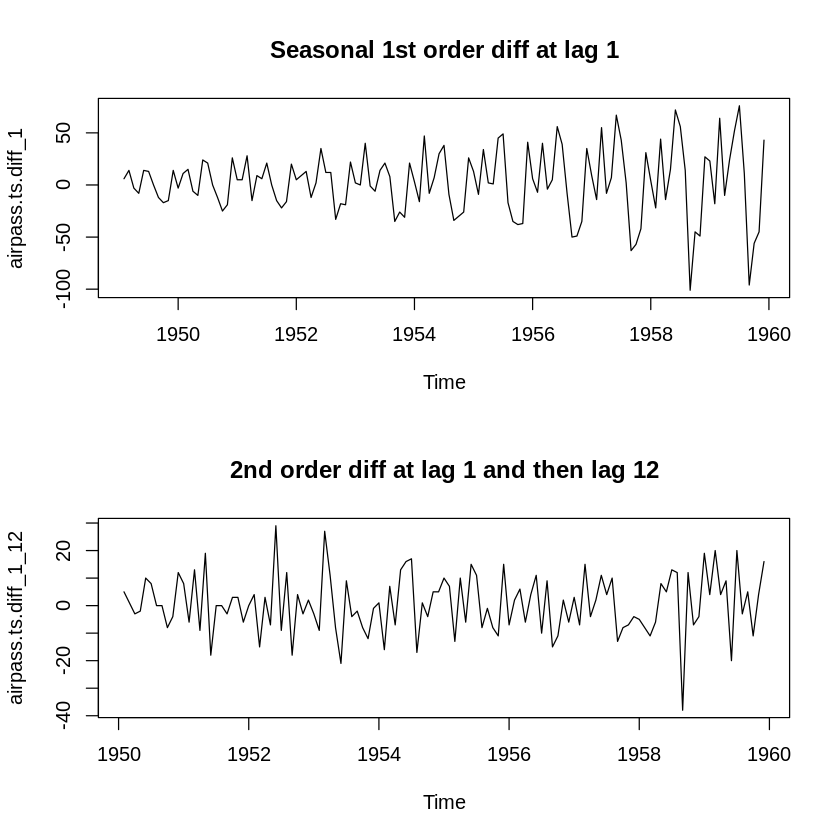

In [8]:
par(mfrow=c(2,1))
### Take the 1st order differencing of lag 12 for seasonality
airpass.ts.diff_1  <- diff(airpass.ts, lag = 1)
plot(airpass.ts.diff_1, main = 'Seasonal 1st order diff at lag 1')

### After taking the lag 1 difference, the PACF and ACF is still very distinct in lag 12.

### Take second order differencing at lag 12
airpass.ts.diff_1_12  <- diff(airpass.ts.diff_1, lag = 12)
plot(airpass.ts.diff_1_12, main = '2nd order diff at lag 1 and then lag 12') 
### This is stationarilized, it has ACF

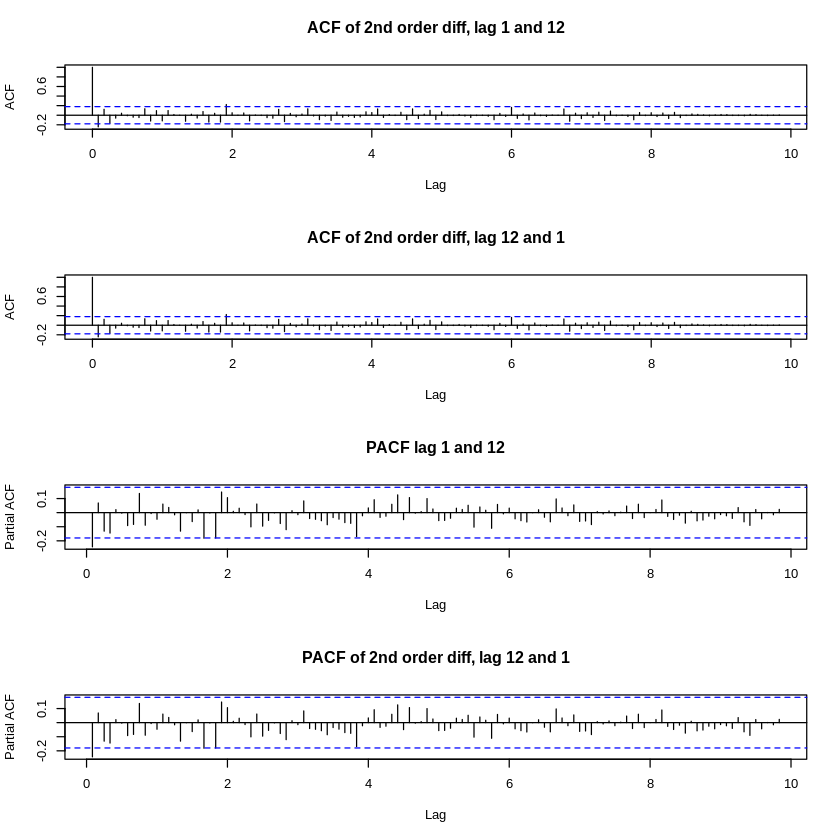

In [9]:
par(mfrow=c(4,1))
acf(airpass.ts.diff_1_12, lag.max = 600, main = 'ACF of 2nd order diff, lag 1 and 12') ### 
acf(airpass.ts.diff_12_1, lag.max = 600, main = 'ACF of 2nd order diff, lag 12 and 1') ###
acf(type = 'partial', airpass.ts.diff_1_12, lag.max = 600, main = 'PACF lag 1 and 12') ### 
acf(type = 'partial', airpass.ts.diff_12_1, lag.max = 600, main = 'PACF of 2nd order diff, lag 12 and 1') ### 
#### Sequence of taking orders does not matter

##### Comparing AutoArima with the model I fit according to the analysis of differencing and ACF/PACF

In [10]:
#### Above chart suggest (p=1,d=1,q=0, P=0,D=1,Q=0, m=12), or 1,1,1,0,1,0,12
#### Negative acf(1) sig, MA1

In [11]:
library(astsa)

### Run Auto Arima
model_0 = auto.arima(airpass.ts, d=1, approximation=FALSE)### Approximation what does it do
model_0


Attaching package: ‘astsa’

The following object is masked from ‘package:forecast’:

    gas



Series: airpass.ts 
ARIMA(1,1,0)(0,1,0)[12] 

Coefficients:
          ar1
      -0.2431
s.e.   0.0894

sigma^2 estimated as 109.8:  log likelihood=-447.95
AIC=899.9   AICc=900.01   BIC=905.46

In [12]:
### Comparing Models
model1<-arima(airpass.ts,order=c(1, 1, 0),
            seasonal=list(order=c(0, 1, 0), period=12))
#### This is the model I fit, 
SSE1<-sum(model1$residuals^2)
model1.test<-Box.test(model1$residuals, lag = log(length(model1$residuals)))

model2<-model_0 ### This is the autoarima
SSE2<-sum(model2$residuals^2)
model2.test<-Box.test(model2$residuals, lag = log(length(model2$residuals)))

df<-data.frame(row.names=c('AIC', 'SSE', 'p-value'), c(model1$aic, SSE1, model1.test$p.value), 
               c(model2$aic, SSE2, model2.test$p.value))
colnames(df)<-c('Model1: by Dahai', 'Model2: By Auto Arima')
format(df, scientific=FALSE)

,Model1: by Dahai,Model2: By Auto Arima
AIC,899.9021244,899.9021244
SSE,12956.3198804,12956.3198804
p-value,0.3672537,0.3672537


In [13]:
model1


Call:
arima(x = airpass.ts, order = c(1, 1, 0), seasonal = list(order = c(0, 1, 0), 
    period = 12))

Coefficients:
          ar1
      -0.2431
s.e.   0.0894

sigma^2 estimated as 108.9:  log likelihood = -447.95,  aic = 899.9

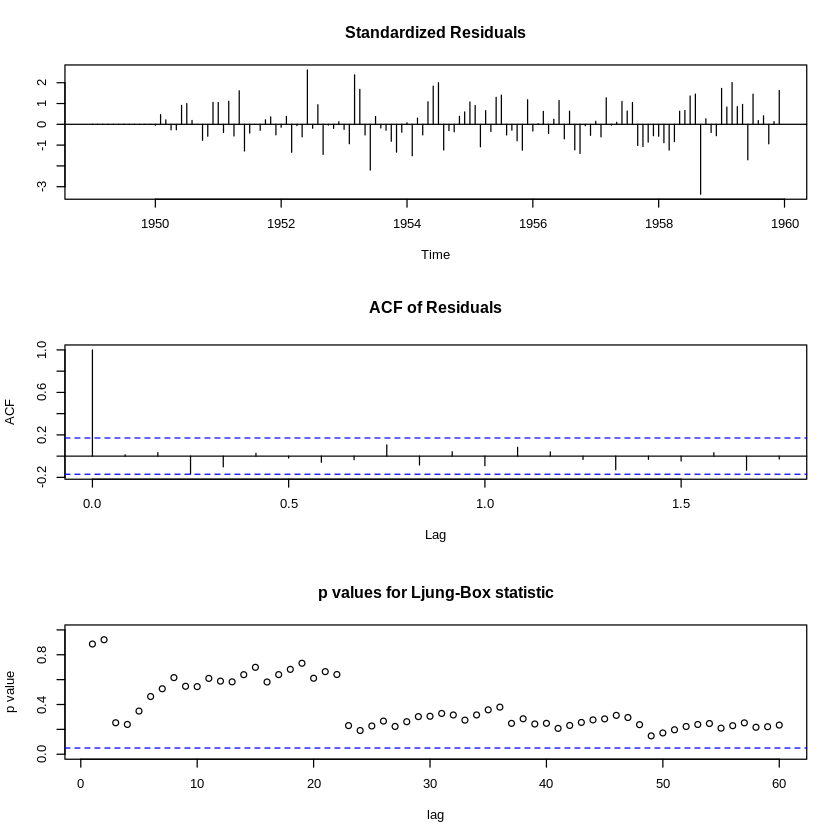

In [14]:
## Model Diagnostic
tsdiag(model1,gof=60)

initial  value 2.378764 
iter   2 value 2.348419
iter   3 value 2.348410
iter   4 value 2.348410
iter   4 value 2.348410
final  value 2.348410 
converged
initial  value 2.345358 
iter   2 value 2.345356
iter   2 value 2.345356
iter   2 value 2.345356
final  value 2.345356 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
          ar1
      -0.2431
s.e.   0.0894

sigma^2 estimated as 108.9:  log likelihood = -447.95,  aic = 899.9

$degrees_of_freedom
[1] 118

$ttable
    Estimate     SE t.value p.value
ar1  -0.2431 0.0894 -2.7183  0.0076

$AIC
[1] 5.705352

$AICc
[1] 5.721208

$BIC
[1] 4.727191


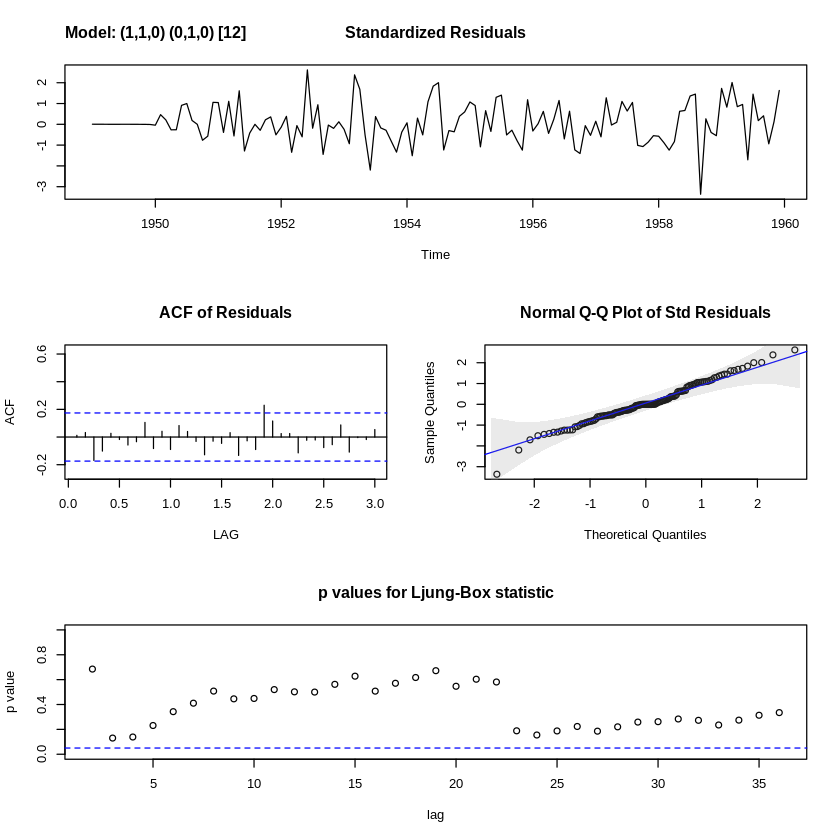

In [15]:
### To check different test, another way to call SARIMA rather than ARIMA
sarima(airpass.ts, 1,1,0,0,1,0, S = 12) 
### I don't know if this model is OK. Some P is sig?

### (b) Forecast the next 12 values for the year 1960 and compute the corre-sponding 95% forecasting intervals.  You should also plot out the graph of the forecasts.

In [16]:
### Predict
model_0_forecast <- forecast(model_0, h = 12, level = 95)
model_0_forecast


         Point Forecast    Lo 95    Hi 95
Jan 1960       424.1099 403.5724 444.6474
Feb 1960       407.0557 381.2989 432.8125
Mar 1960       470.8257 440.0971 501.5544
Apr 1960       460.8817 426.0208 495.7426
May 1960       484.8681 446.2846 523.4515
Jun 1960       536.8714 494.9011 578.8417
Jul 1960       612.8706 567.7655 657.9757
Aug 1960       623.8708 575.8354 671.9062
Sep 1960       527.8707 477.0737 578.6677
Oct 1960       471.8707 418.4547 525.2868
Nov 1960       426.8707 370.9582 482.7832
Dec 1960       469.8707 411.5685 528.1729

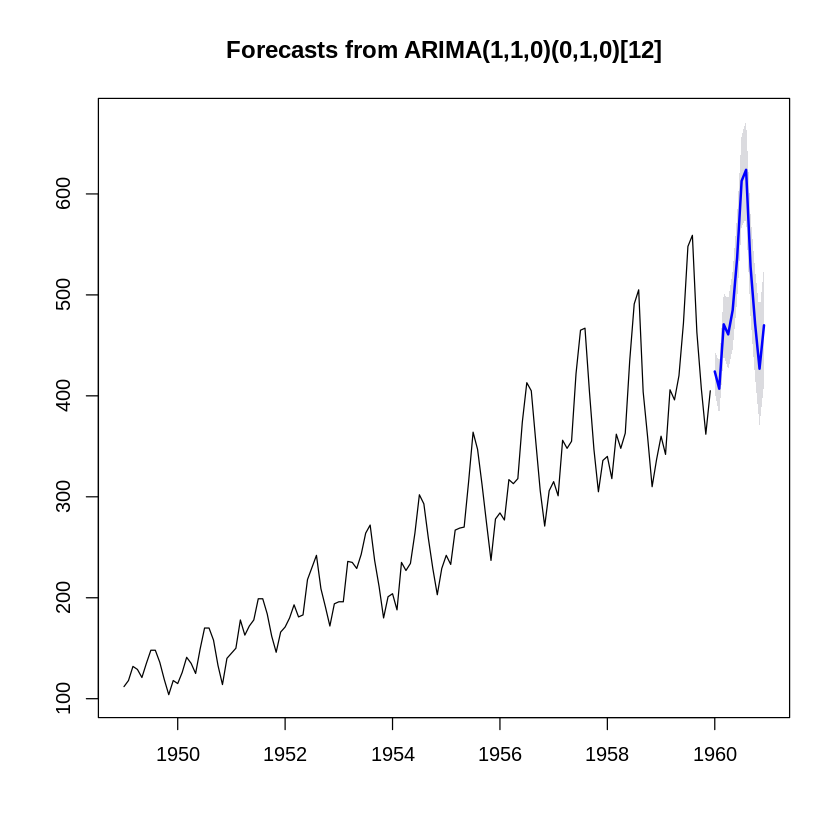

In [17]:
plot(model_0_forecast)

In [18]:
### train_test_split
airpass.ts      = ts(airdata$airpass, frequency = 12, start = c(1949,1), end = c(1959, 12)) # years 1949- 1959.
airpass.ts

airpass.ts.test = ts(tail(airdata$airpass, n = 12), frequency = 12, start = c(1960,1))
airpass.ts.test


     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

In [19]:
### Compare forecast with true labels
model_0_forecast
model_0_forecast$mean
airpass.ts.test

         Point Forecast    Lo 95    Hi 95
Jan 1960       424.1099 403.5724 444.6474
Feb 1960       407.0557 381.2989 432.8125
Mar 1960       470.8257 440.0971 501.5544
Apr 1960       460.8817 426.0208 495.7426
May 1960       484.8681 446.2846 523.4515
Jun 1960       536.8714 494.9011 578.8417
Jul 1960       612.8706 567.7655 657.9757
Aug 1960       623.8708 575.8354 671.9062
Sep 1960       527.8707 477.0737 578.6677
Oct 1960       471.8707 418.4547 525.2868
Nov 1960       426.8707 370.9582 482.7832
Dec 1960       469.8707 411.5685 528.1729

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1960 424.1099 407.0557 470.8257 460.8817 484.8681 536.8714 612.8706 623.8708
          Sep      Oct      Nov      Dec
1960 527.8707 471.8707 426.8707 469.8707

     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1960 417 391 419 461 472 535 622 606 508 461 390 432

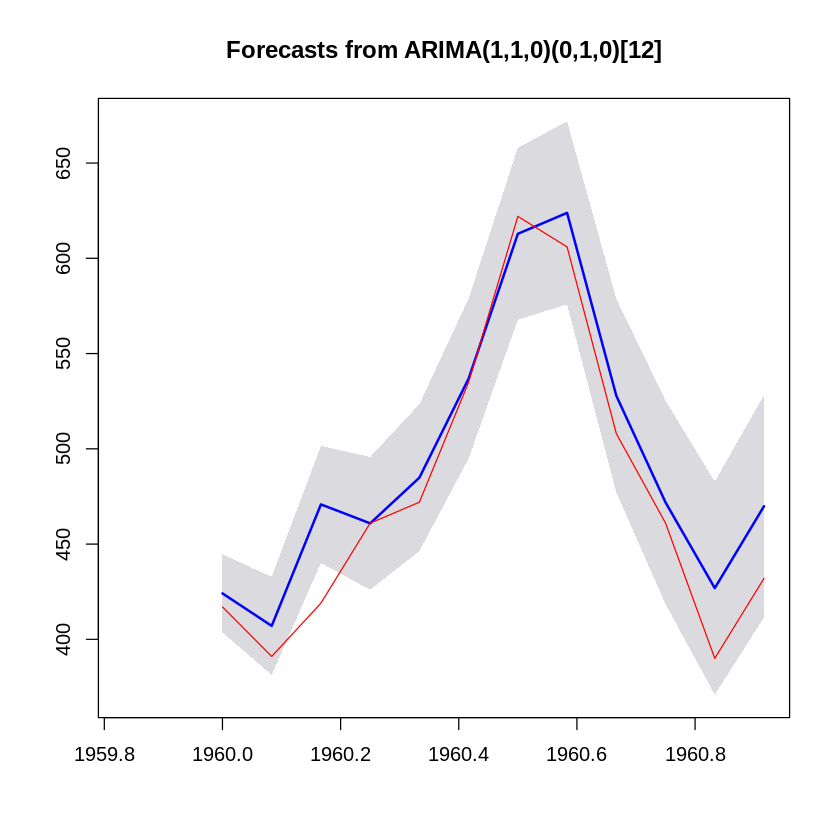

In [20]:
### Plot the comparison
plot(model_0_forecast, include = 0)
lines(airpass.ts.test, col = 'red')

             Jan         Feb         Mar         Apr         May         Jun
1960  -7.1098939 -16.0557017 -51.8257459   0.1183445 -12.8680621  -1.8713671
             Jul         Aug         Sep         Oct         Nov         Dec
1960   9.1294365 -17.8707589 -19.8707114 -10.8707229 -36.8707201 -37.8707208

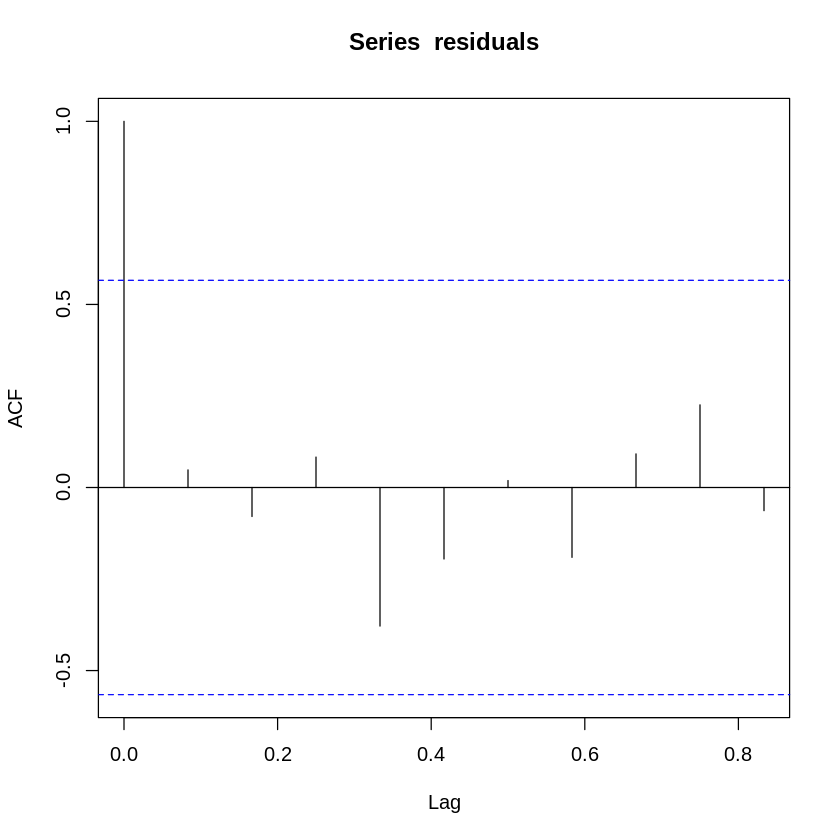

In [21]:
#rt <- airpass.noseason - mt
residuals  <- airpass.ts.test - model_0_forecast$mean
residuals
acf(residuals)
mse <- mean((model_0_forecast$mean - airpass.ts.test)^2)


In [22]:
mse <- mean((model_0_forecast$mean - airpass.ts.test)^2)
mse

[1] 572.7264

### 4.  Perform a time series analysis on the weekly exchange rate between theU.S. dollar and the pound sterling for the year 1980 - 1988.  Answer thefollowing:

### (a) Is the exchange rate stationary?

In [23]:
exchange_data = read.csv("exchange.csv",header = F,sep = ",")

In [24]:
exchange.ts = ts(exchange_data, frequency = 12, start = c(1980,1), end = c(1988, 12)) 

In [25]:
exchange.ts

      Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec
1980 2.24 2.26 2.29 2.26 2.27 2.30 2.30 2.28 2.27 2.23 2.21 2.18
1981 2.17 2.14 2.20 2.22 2.18 2.26 2.27 2.28 2.33 2.35 2.33 2.34
1982 2.34 2.35 2.36 2.38 2.37 2.39 2.33 2.37 2.38 2.37 2.40 2.41
1983 2.41 2.39 2.39 2.39 2.40 2.42 2.44 2.44 2.42 2.40 2.36 2.36
1984 2.34 2.32 2.34 2.34 2.38 2.40 2.39 2.41 2.37 2.34 2.28 2.31
1985 2.20 2.19 2.22 2.27 2.23 2.21 2.18 2.15 2.17 2.14 2.12 2.07
1986 2.07 2.07 1.93 1.96 1.97 1.95 1.89 1.89 1.86 1.84 1.84 1.79
1987 1.81 1.88 1.85 1.84 1.78 1.84 1.79 1.82 1.91 1.83 1.82 1.84
1988 1.88 1.91 1.90 1.96 1.94 1.89 1.88 1.89 1.91 1.92 1.87 1.87

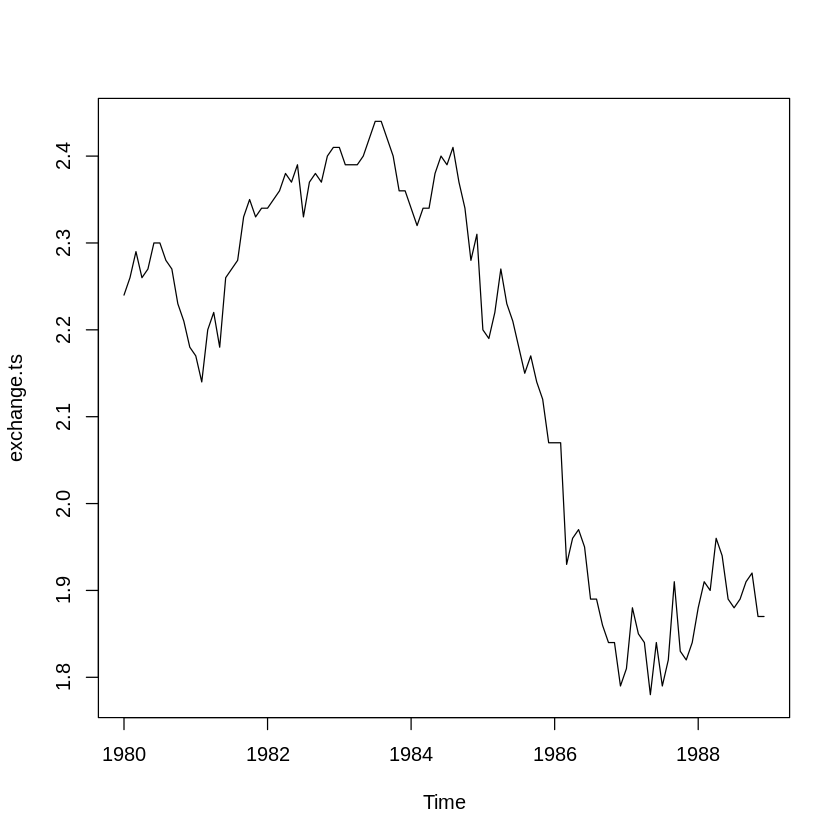

In [26]:
plot(exchange.ts)

### (b) Are there difference regimes?  Provide statistical tests.

In [27]:
Box.test(exchange.ts, lag = log(length(exchange.ts)))


	Box-Pierce test

data:  exchange.ts
X-squared = 386.93, df = 4.6821, p-value < 2.2e-16


In [28]:
exchange_diff  <- diff(exchange.ts, lag = 1)
exchange_diff

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1980        0.02  0.03 -0.03  0.01  0.03  0.00 -0.02 -0.01 -0.04 -0.02 -0.03
1981 -0.01 -0.03  0.06  0.02 -0.04  0.08  0.01  0.01  0.05  0.02 -0.02  0.01
1982  0.00  0.01  0.01  0.02 -0.01  0.02 -0.06  0.04  0.01 -0.01  0.03  0.01
1983  0.00 -0.02  0.00  0.00  0.01  0.02  0.02  0.00 -0.02 -0.02 -0.04  0.00
1984 -0.02 -0.02  0.02  0.00  0.04  0.02 -0.01  0.02 -0.04 -0.03 -0.06  0.03
1985 -0.11 -0.01  0.03  0.05 -0.04 -0.02 -0.03 -0.03  0.02 -0.03 -0.02 -0.05
1986  0.00  0.00 -0.14  0.03  0.01 -0.02 -0.06  0.00 -0.03 -0.02  0.00 -0.05
1987  0.02  0.07 -0.03 -0.01 -0.06  0.06 -0.05  0.03  0.09 -0.08 -0.01  0.02
1988  0.04  0.03 -0.01  0.06 -0.02 -0.05 -0.01  0.01  0.02  0.01 -0.05  0.00

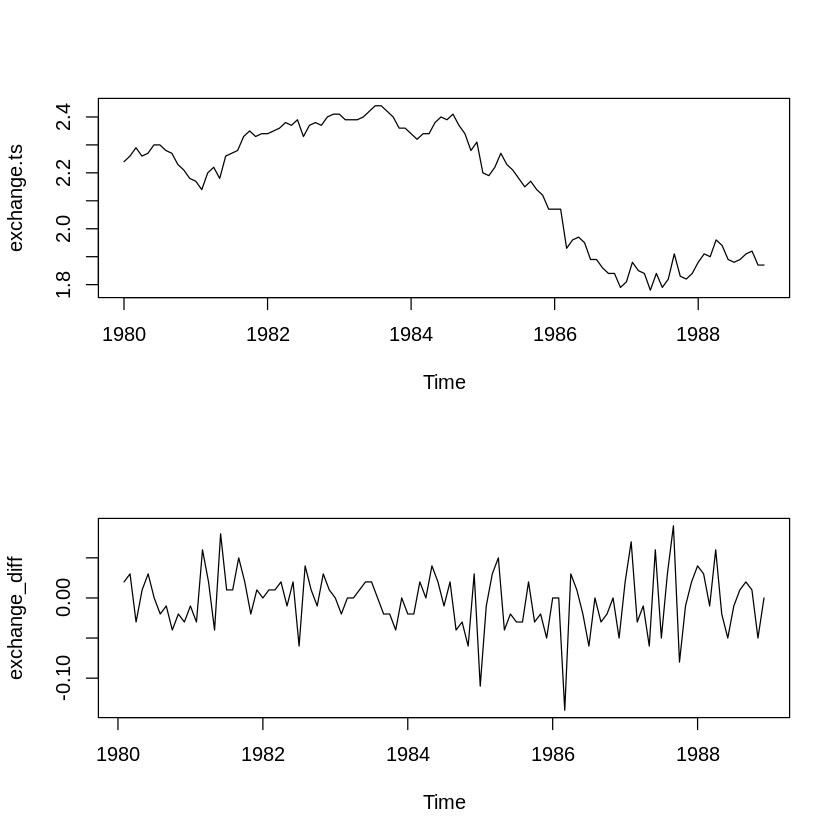

In [29]:
par(mfrow=c(2,1))
plot(exchange.ts)
plot(exchange_diff)

In [30]:
Box.test(exchange_diff)  ### now is stationary


	Box-Pierce test

data:  exchange_diff
X-squared = 1.5515, df = 1, p-value = 0.2129


### (c) What other information you need for better forecasting of the exchangerate?